**Section 5B**
2/6/25

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Fermi-Dirac Statistics

Grand canonical ensemble has constant volume, temperature, and chemical potential, but it can exchange heat and particles with a reservoir. 

$ \Xi(z, \beta) = \prod_{j=1}^{M} \left(1 + z \, e^{-\beta j \epsilon}\right), \quad \text{where } z = e^{\beta \mu}. $

# Task 2: Bose-Einstein Condensate (BEC)

**Part a) Microstates**

2 level system with energy levels $E_0=0, E_1=\epsilon$. Total of N indistinguishable bosons. 

Number in the ground state: $n_0=0, 1, 2, 3, ... N$ and $n_1=N-n_0$. <br>
Energy of the microstate is $E=0*n_0+\epsilon*n_1 = \epsilon*(N-n_0)$. <br>
There are N+1 microstates in total, corresponding to $n_0=0, 1, 2, ... N$.

**Part b) (classical) partition function under the canonical ensemble**

$$Z _C = \sum_{n_0=0}^{N} \binom{N}{n_0} e^{-\beta E}$$
$$\binom{N}{n_0} = \frac{N!}{n_0!(N-n_0)!} = \frac{N!}{n_0!n_1!}$$
$$E = \epsilon(N-n_0)$$

$$Z_C = (1+e^{-\beta \epsilon})^N$$

The binomial factor is needed because it takes into account the number of possible configurations for indistinguishable particles. 
The probability of finding a particular microstate with energy E is 
$$P(E) = \frac{e^{-\beta E}}{Z_C}$$

**Part c) (Classical) Average particle number under the canonical ensemble**

$$\langle n_0\rangle_C = \frac{N}{1+e^{-\beta \epsilon}}$$
$$\langle n_1\rangle = \frac{Ne^{-\beta \epsilon}}{1+e^{-\beta \epsilon}}$$

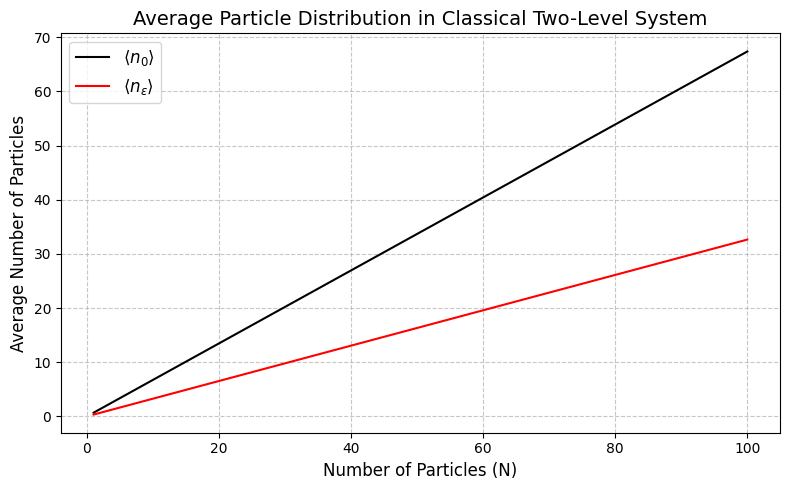

In [27]:
N = np.linspace(1, 100, 100)
epsilon = 2e-18 # energy of first excited state
kB = 1.38e-23
T = 2e5 # temp in K
beta = 1/(kB*T)

def n0(N):
    return N/(1+np.exp(-beta*epsilon))

def n1(N):
    return N*np.exp(-beta*epsilon)/(1+np.exp(-beta*epsilon))

plt.figure(figsize=(8, 5))
plt.plot(N, n0(N), label=r'$\langle n_0 \rangle$', color='k')
plt.plot(N, n1(N), label=r'$\langle n_\epsilon \rangle$', color='r')
plt.xlabel('Number of Particles (N)', fontsize=12)
plt.ylabel('Average Number of Particles', fontsize=12)
plt.title('Average Particle Distribution in Classical Two-Level System', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Part d) (Quantum) partition function under the canonical ensemble**

$$Z = \frac{1-e^{-\beta \epsilon (N+1)}}{1-e^{-\beta \epsilon}}$$
Probability of a certain microstate is: 
$$P(E) = \frac{e^{-\beta n_1 \epsilon}}{Z} = \frac{(1-e^{-\beta \epsilon})e^{-\beta n_1 \epsilon}}{1-e^{-\beta \epsilon (N+1)}}$$

**Part e) (Quantum) Average particle number under the canonical ensemble**

$$\langle n_{1} \rangle = \frac{e^{-\beta \epsilon}}{1-e^{-\beta \epsilon}} - \frac{(N+1)e^{-\beta \epsilon (N+1)}}{1-e^{-\beta \epsilon (N+1)}}$$
$$\langle n_{0} \rangle = N - \langle n_{1} \rangle$$

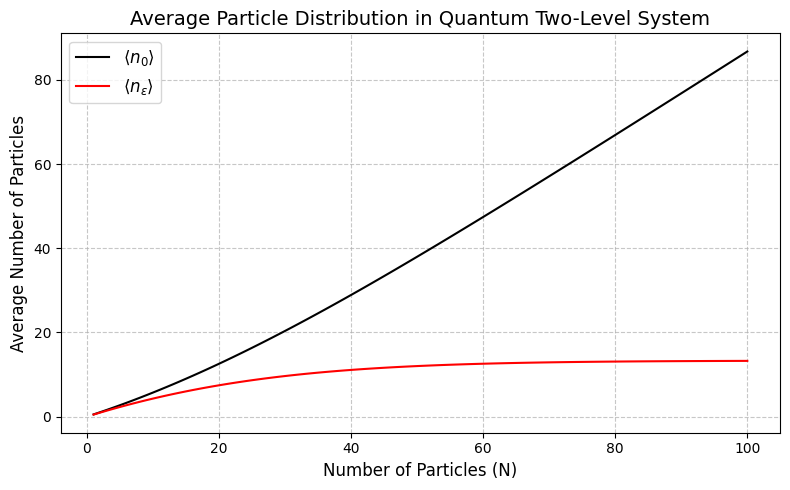

In [31]:
N = np.linspace(1, 100, 100)
epsilon = 2e-18 # energy of first excited state
kB = 1.38e-23
T = 2e6 # temp in K
beta = 1/(kB*T)

def n1q(N):
    return np.exp(-beta*epsilon)/(1-np.exp(-beta*epsilon)) - (N+1)*np.exp(-beta*epsilon*(N+1))/(1-np.exp(-beta*epsilon*(N+1)))

def n0q(N):
    return N - n1q(N)

plt.figure(figsize=(8, 5))
plt.plot(N, n0q(N), label=r'$\langle n_0 \rangle$', color='k')
plt.plot(N, n1q(N), label=r'$\langle n_\epsilon \rangle$', color='r')
plt.xlabel('Number of Particles (N)', fontsize=12)
plt.ylabel('Average Number of Particles', fontsize=12)
plt.title('Average Particle Distribution in Quantum Two-Level System', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Part f) (Quantum) quantum partition function under the Grand canonical ensemble**

$\Omega_G = \frac{1}{(1-z)(1-z e^{-\beta \epsilon})}$, with $z = e^{\beta\mu}$. <br>
$\mu$ is the chemical potential. 

The condition for a normalizable system is to have $\mu - \epsilon < 0$, or in other words, $\mu < \epsilon$. 

**Part g) (Quantum) Particle number under the Grand canonical ensemble**

Average ground state particle number:
$$\langle n \rangle = k_B T \frac{\partial}{\partial{\mu}} \ln{(\Omega_G)}$$